#  Image Classification with Pre-trained Models (Keras Applications)

 Keras provides many pre-trained models trained on the ImageNet dataset (1.4M images, 1000
 classes).\
 These models can be used for:\
 - Image classification
 - Feature extraction
 - Fine-tuning for custom tasks.

Keras Applications are state-of-the-art, pre-trained CNNs (trained on ImageNet, 1k classes).\
 They’re great for:\
 - Prediction (zero-shot image classification)
 - Feature extraction (as backbones for your tasks)
 - Fine-tuning (transfer learning on your dataset)

# Import Libraries
 - time → measure how fast predictions are\
 - numpy → for handling images as numbers\
 - tensorflow → the deep learning library\
 - image → load and preprocess images\
 - Pre-trained models & their helpers → ResNet, Xception, EfficientNet, NASNet

In [7]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Model families (for preprocess & decode)
from tensorflow.keras.applications import resnet_v2, xception, efficientnet, nasnet

# Individual models
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet import EfficientNetB3, EfficientNetB7
from tensorflow.keras.applications.nasnet import NASNetLarge

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


# **Load & Preprocess an Image**
**Goal:** Prepare our image for the model.\
**Why:** Models expect numbers in a specific format (size, batch, normalization)

In [10]:
 def load_and_preprocess(img_path, target_size, preprocess_fn):
     """
     1. Load image from disk
     2. Resize to model's expected size
     3. Convert to a numerical array
     4. Add a batch dimension (model expects 1 image at a time)
     5. Apply model-specific preprocessing
     """
     img = image.load_img(img_path, target_size=target_size)
     x = image.img_to_array(img)
     x = np.expand_dims(x, axis=0)
     x = preprocess_fn(x)
     return x

# Set Image Path

In [12]:
IMG_PATH = r"C:\Ds & AI ( my work)\Deep_Learning\Image_Classification_with_Pre-trained_Models_(Keras)\input-2.jpeg"
import os
print("Using image:", IMG_PATH, "| Exists:", os.path.exists(IMG_PATH))

Using image: C:\Ds & AI ( my work)\Deep_Learning\Image_Classification_with_Pre-trained_Models_(Keras)\input-2.jpeg | Exists: True


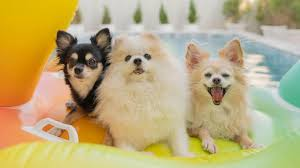

In [14]:
#Load image
img = image.load_img(IMG_PATH)
img

# Run One Model at a Time
## 1.ResNet50V2
 - Why ResNet50V2?\
     - Reliable, fast, good accuracy.\
     - Input size: 224×224 pixels.\
 - What happens here:\
     1. Image resized to 224×224 → model expects this.
     2. predict() → gives probabilities for 1000 ImageNet classes.
     3. decode_predictions() → converts numbers to readable labels, e.g., “jeep”, “car”, etc

In [18]:
# Load and preprocess image
x = load_and_preprocess(IMG_PATH, target_size=(224,224),
  preprocess_fn=resnet_v2.preprocess_input)

 # Load pre-trained model
model = ResNet50V2(weights="imagenet")

 # Predict
start = time.time()
preds = model.predict(x)
end = time.time()

 # Decode predictions (top-5)
from tensorflow.keras.applications.resnet_v2 import decode_predictions
top5 = decode_predictions(preds, top=5)[0]

print(f"Inference time: {end-start:.3f} sec")
print("Top-5 Predictions:")
for i, (imagenet_id, label, score) in enumerate(top5, 1):
    print(f"{i}. {label:25s} ({score:.2f})")

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step 
Inference time: 3.568 sec
Top-5 Predictions:
1. Eskimo_dog                (0.33)
2. Siberian_husky            (0.21)
3. Pomeranian                (0.07)
4. malamute                  (0.05)
5. Samoyed                   (0.04)


## 2. Xception
 - Why Xception?\
     - Uses depthwise separable convolutions → efficient and accurate.\
     - Input size: 299×299 pixels.

In [22]:
x = load_and_preprocess(IMG_PATH, target_size=(299,299), preprocess_fn=xception.
 preprocess_input)
model = Xception(weights="imagenet")
preds = model.predict(x)
top5 = xception.decode_predictions(preds, top=5)[0]

print("Top-5 Predictions (Xception):")
for i, (imagenet_id, label, score) in enumerate(top5, 1):
     print(f"{i}. {label:25s} ({score:.2f})")

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Top-5 Predictions (Xception):
1. Pomeranian                (0.45)
2. Chihuahua                 (0.27)
3. papillon                  (0.04)
4. Japanese_spaniel          (0.01)
5. toy_terrier               (0.01)


# 3. NASNetLarge
 - Why NASNetLarge?\
    - Very accurate, designed via neural architecture search.\
    - Input: 331×331 pixels.

In [23]:
x = load_and_preprocess(IMG_PATH, target_size=(331,331), preprocess_fn=nasnet.
  preprocess_input)
model = NASNetLarge(weights="imagenet")
preds = model.predict(x)
top5 = nasnet.decode_predictions(preds, top=5)[0]

print("Top-5 Predictions (NASNetLarge):")
for i, (imagenet_id, label, score) in enumerate(top5, 1):
     print(f"{i}. {label:25s} ({score:.2f})")

359748576/359748576 ━━━━━━━━━━━━━━━━━━━━ 144s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Top-5 Predictions (NASNetLarge):
1. Pomeranian                (0.76)
2. Chihuahua                 (0.08)
3. papillon                  (0.01)
4. keeshond                  (0.00)
5. Japanese_spaniel          (0.00)


 # Key Takeaways (Non-Tech Version) 
 
 1. ResNet50V2 → fast, reliable baseline.\
 2. Xception → efficient, accurate with medium input size.\
 3. NASNetLarge → very accurate but slow.\
       Tip: For beginners or real-time apps → use ResNet50V2 or EfficientNetB3.
        For research/accuracy comparison → try EfficientNetB7 or NASNetLarge.
 # Conclusion & Summary
 
 - Pre-trained Models are deep learning models already trained on large datasets like Ima
geNet.
 - They can be used for image classification, feature extraction, or transfer learning
 without training from scratch.
 - Transformers and CNNs like EfficientNet, ResNet, Xception, and NASNet are popular
 pre-trained models.
 - **How to use them:**
 1. Load the model with pre-trained weights.\
 2. Preprocess your image (resize, normalize) according to the model’s requirements.\
 3. Run inference to predict classes.\
 4. Optionally, fine-tune the model for custom datasets.\
 - Real-time applications & examples:– \
       - mobile apps: Recognizing objects or animals in photos.
       - Self-driving cars: Detecting pedestrians, vehicles, traffic signs.
       - Healthcare: Identifying diseases from X-rays or scans.
       - Retail: Visual search, product recognition, and recommendation.
 - **Model choice tip:**
       - Lightweight models like ResNet50V2 or EfficientNetB3 → fast predictions for real
time apps.\
       - Heavier models like NASNetLarge or EfficientNetB7 → higher accuracy, used in
 research or offline processing.
 - Pre-trained models save time, computation, and improve accuracy while enabling prac
tical real-world applications